<a href="https://colab.research.google.com/github/cristobalperez70-max/Aprendizaje-Maquina/blob/main/RNA%3BTipos_De_Capas_Capas_Densas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capas Densas (Fully Connected) — Explicación y Aplicación a Degradación de Inventarios

---


## 1) ¿Qué es una *capa densa* (fully connected)?

**Idea básica:**
- Una capa densa (o *fully connected*, FC) es una capa donde **cada neurona está conectada a todas las salidas de la capa anterior**.

**Matemáticamente:**
- Sea x el vector de entrada (dimensión `n`). Una capa densa con `m` neuronas calcula:

  \[ y = f(W x + b) \]

donde:
- `W` es una matriz de pesos de tamaño `m × n`.
- `b` es un vector de sesgos (bias) de tamaño `m`.
- `f(·)` es la función de activación aplicada elemento a elemento.

**Parámetros principales de una capa Dense:**
- `units` (número de neuronas): define la dimensión de la salida `m`.
- `activation`: la función no lineal aplicada (ReLU, sigmoid, tanh, linear, etc.).
- `use_bias`: booleano, si se incluye o no el vector `b`.
- `kernel_initializer` y `bias_initializer`: cómo se inicializan los pesos y biases.

**Por qué estos parámetros importan (intuición):**
- **`units` (cantidad de neuronas):**
  - Más neuronas → mayor capacidad de representación (puede aprender funciones más complejas).
  - Demasiadas neuronas → riesgo de *overfitting* (aprende ruido) y más costo computacional.
  - Pocas neuronas → puede no tener capacidad para ajustar la función objetivo (*underfitting*).
  - Regla práctica inicial: empezar con un número moderado (por ejemplo, entre 8 y 128 según problema y datos) y validar.

- **`activation`:**
  # 🔹 Funciones de Activación en Redes Neuronales

---

### 1. Función lineal (linear)  
La salida es igual a la entrada, sin transformación.  
**Uso típico:** en la **capa de salida** de una red para **regresión** (predicción de valores continuos).  

$$
f(x) = x
$$

---

### 2. Función sigmoide  
Comprime la entrada en el rango $(0,1)$, útil para probabilidades.  
**Uso típico:** en **clasificación binaria**, ya que modela la probabilidad de pertenecer a una clase.  

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

### 3. Función softmax  
Generaliza la sigmoide al caso multiclase, transformando un vector en una distribución de probabilidad.  
**Uso típico:** en la **capa de salida** para **clasificación multiclase**.  

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
\quad \text{para } i = 1, \dots, K
$$

---

### 4. Función ReLU (Rectified Linear Unit)  
Devuelve la entrada si es positiva, y cero si es negativa.  
**Uso típico:** en **capas ocultas**, porque acelera el entrenamiento y evita problemas de saturación de gradientes.  

$$
f(x) = \max(0, x)
$$


**Usos recomendados:**
- Capas ocultas en redes para aprendizaje supervisado (clasificación o regresión).
- Última capa para producir predicciones (con `activation='linear'` para regresión, `sigmoid` para clasificación binaria, `softmax` para multiclas).

**Interpretación de pesos y biases (intuitiva):**
- Cada neurona calcula una combinación lineal de las entradas; los pesos definen la importancia de cada entrada para esa neurona.
- El bias permite desplazar la función para ajustarse cuando todas las entradas valen cero.

**Mini-resumen:**
- Una capa densa transforma un vector de entrada a otro vector mediante una transformación lineal seguida de una no-linealidad. Sus principales decisiones de diseño influyen directamente en la capacidad, la interpretabilidad y la estabilidad del modelo.


### Mini-ejemplo — ¿Qué hace una sola capa Dense? (Explicación breve antes del código)

En la siguiente celda construiremos un ejemplo mínimo: generamos datos lineales `y = 2*x1 - 3*x2 + ruido`, entrenaremos una red pequeña con una sola capa densa y mostraremos los pesos aprendidos. Veremos cómo los pesos se acercan a los coeficientes reales (2 y -3). Esto ayuda a interpretar qué está aprendiendo la neurona.

**Qué observarás al ejecutar la celda:**
- Pérdida durante el entrenamiento
- Pesos (`kernel`) y bias (`bias`) de la capa Dense final
- Comparación numérica entre coeficientes reales y pesos aprendidos



In [ ]:
# CELDA: Mini-ejemplo con Keras (interpretación de una Dense)
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics

# reproducibilidad
np.random.seed(123)
tf.random.set_seed(123)

# Datos sintéticos: y = 2*x1 - 3*x2 + ruido
n = 500
X = np.random.normal(size=(n, 2))
y = 2 * X[:, 0] - 3 * X[:, 1] + np.random.normal(scale=0.5, size=n)

# Modelo simple: una sola capa densa que produce una salida (regresión)
model = models.Sequential([
    layers.Input(shape=(2,)),           # 2 entradas
    layers.Dense(1, activation='linear') # 1 neurona, salida lineal (regresión)
])

model.compile(optimizer=optimizers.SGD(learning_rate=0.1), loss=losses.MeanSquaredError())

# Entrenamiento breve
history = model.fit(X, y, epochs=80, batch_size=32, verbose=0)

# Obtener pesos y bias
kernel, bias = model.layers[0].get_weights()
print('Pesos aprendidos (kernel):', kernel.flatten())
print('Bias aprendido (bias):', bias)
print('\nComparación (verdadero vs aprendido):')
print('Coef true = [2, -3]')
model.summary()

Pesos aprendidos (kernel): [ 2.0307777 -3.0140734]
Bias aprendido (bias): [0.05638241]

Comparación (verdadero vs aprendido):
Coef true = [2, -3]


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Interpretación del resultado anterior:**

- Los valores en `kernel` son los pesos (uno por cada entrada) que la red aprendió. Esperamos algo cercano a `[2, -3]`.
- El `bias` compensa el desplazamiento del modelo.

**Por qué usamos `activation='linear'`:** porque es un problema de regresión (no queremos aplicar no-linealidad en la salida final). Si hubiésemos construido una red más profunda con ReLU en capas ocultas, podríamos aprender relaciones no-lineales.



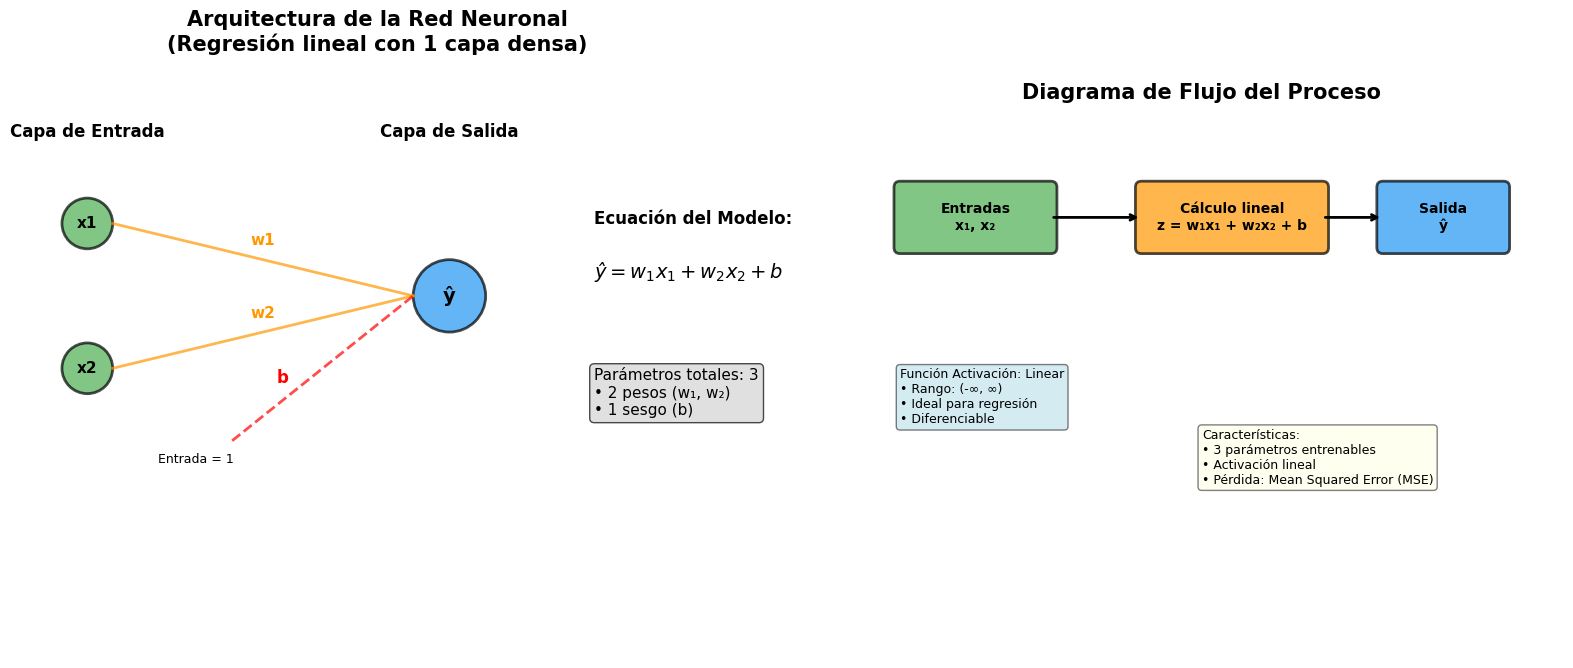

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, FancyBboxPatch

# ==============================
# FIGURA CON 2 SUBPLOTS
# ==============================
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# ===========================================================
# SUBPLOT 1: Arquitectura de la Red
# ===========================================================
ax1 = ax[0]
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 8)
ax1.set_aspect('equal')
ax1.axis('off')
ax1.set_title('Arquitectura de la Red Neuronal\n(Regresión lineal con 1 capa densa)',
              fontsize=15, fontweight='bold', pad=20)

# Colores
input_color = '#4CAF50'   # Verde
output_color = '#2196F3'  # Azul
weight_color = '#FF9800'  # Naranja
bias_color = 'red'

# Entradas
ax1.text(1, 7.2, 'Capa de Entrada', fontsize=12, fontweight='bold', ha='center')
for i in range(2):
    circle = Circle((1, 6 - i*2), 0.35, fill=True,
                    color=input_color, alpha=0.7, ec='black', lw=2)
    ax1.add_patch(circle)
    ax1.text(1, 6 - i*2, f'x{i+1}', ha='center', va='center',
            fontweight='bold', fontsize=11)

# Neurona de salida
ax1.text(6, 7.2, 'Capa de Salida', fontsize=12, fontweight='bold', ha='center')
circle = Circle((6, 5), 0.5, fill=True,
                color=output_color, alpha=0.7, ec='black', lw=2)
ax1.add_patch(circle)
ax1.text(6, 5, 'ŷ', ha='center', va='center',
        fontweight='bold', fontsize=14)

# Conexiones (pesos)
for i in range(2):
    ax1.plot([1.35, 5.5], [6 - i*2, 5], color=weight_color, lw=2, alpha=0.7)
    mid_x = (1.35 + 5.5) / 2
    mid_y = (6 - i*2 + 5) / 2
    ax1.text(mid_x, mid_y + 0.2, f'w{i+1}', ha='center', fontsize=11,
            color=weight_color, fontweight='bold')

# Bias
ax1.plot([3, 5.5], [3, 5], color=bias_color, lw=2, linestyle='--', alpha=0.7)
ax1.text(3.7, 3.8, 'b', ha='center', fontsize=12,
        color=bias_color, fontweight='bold')
ax1.text(2.5, 2.7, 'Entrada = 1', fontsize=9, ha='center')

# Ecuación
equation_text = r'$ŷ = w_1 x_1 + w_2 x_2 + b$'
ax1.text(8, 6, 'Ecuación del Modelo:', fontsize=12, fontweight='bold', ha='left')
ax1.text(8, 5.5, equation_text, fontsize=14, ha='left', va='top')

# Parámetros
params_text = 'Parámetros totales: 3\n• 2 pesos (w₁, w₂)\n• 1 sesgo (b)'
ax1.text(8, 4, params_text, fontsize=11, ha='left', va='top',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))

# ===========================================================
# SUBPLOT 2: Diagrama de Flujo
# ===========================================================
ax2 = ax[1]
ax2.set_xlim(0, 12)
ax2.set_ylim(0, 8)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.set_title('Diagrama de Flujo del Proceso', fontsize=15, fontweight='bold', pad=20)

# Bloques
blocks = [
    (1, 6, 2.5, 1, 'Entradas\nx₁, x₂', '#4CAF50'),
    (5, 6, 3, 1, 'Cálculo lineal\nz = w₁x₁ + w₂x₂ + b', '#FF9800'),
    (9, 6, 2, 1, 'Salida\nŷ', '#2196F3'),
]

for (x, y, w, h, text, color) in blocks:
    rect = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1",
                         facecolor=color, alpha=0.7, ec='black', lw=2)
    ax2.add_patch(rect)
    ax2.text(x + w/2, y + h/2, text, ha='center', va='center',
             fontweight='bold', fontsize=10)

# Flechas
arrows = [
    (3.5, 6.5, 5, 6.5),  # Entrada → Cálculo
    (8, 6.5, 9, 6.5),    # Cálculo → Salida
]

for (sx, sy, ex, ey) in arrows:
    ax2.annotate('', xy=(ex, ey), xytext=(sx, sy),
                 arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# ===============================
# Información adicional (adaptada)
# ===============================
activation_desc = "Función Activación: Linear\n• Rango: (-∞, ∞)\n• Ideal para regresión\n• Diferenciable"
ax2.text(1, 4, activation_desc, fontsize=9, ha='left', va='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.5))

info_text = "Características:\n• 3 parámetros entrenables\n• Activación lineal\n• Pérdida: Mean Squared Error (MSE)"
ax2.text(6, 3, info_text, fontsize=9, ha='left', va='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.show()


## 2) Problema aplicado — regresión de pérdidas por degradación

Generaremos el siguiente dataset: `temperatura`, `tiempo_almacenamiento`, `categoria` (congelado/refrigerado/ambiente) y `perdida_pct`. Entrenaremos:
- Regresión lineal (baseline)
- RandomForestRegressor (bagging)
- Red neuronal densa (Keras) para regresión

Luego haremos bootstrap para estimar incertidumbre de RMSE y R² y compararemos.


In [ ]:
# CELDA: Generar dataset de pérdidas (regresión)
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

np.random.seed(123)
n_lotes = 200
temperatura = np.random.uniform(10, 30, n_lotes)
tiempo_almacenamiento = np.random.randint(1, 62, n_lotes)
categoria = np.random.choice(['congelado', 'refrigerado', 'ambiente'], size=n_lotes)

efecto_categoria = np.array([ -10 if c=='congelado' else (0 if c=='refrigerado' else 15) for c in categoria ])
perdida_base = 0.2 * temperatura + 0.5 * tiempo_almacenamiento + efecto_categoria
ruido = np.random.normal(0, 5, n_lotes)
perdida_pct = np.clip(perdida_base + ruido, 0, 100)

df_perdidas = pd.DataFrame({
    'temperatura': temperatura,
    'tiempo_almacenamiento': tiempo_almacenamiento,
    'categoria': categoria,
    'perdida_pct': perdida_pct
})
df_perdidas.head()

,temperatura,tiempo_almacenamiento,categoria,perdida_pct
0,23.929384,54,ambiente,51.496019
1,15.722787,26,ambiente,29.507542
2,14.537029,11,refrigerado,9.344743
3,21.026295,48,refrigerado,19.301896
4,24.389379,1,ambiente,18.838195


### Regresión lineal — por qué y cómo

La regresión lineal es un buen punto de partida por su interpretabilidad. Nos dirá cuánto contribuye en promedio cada variable a la pérdida. Sin embargo, si la relación es no-lineal o hay interacciones complejas, modelos como RandomForest o redes neuronales pueden mejorar.

### Red neuronal densa — arquitectura propuesta
- Input: variables numéricas + codificación one-hot de `categoria`.
- Arquitectura sencilla: `Dense(16, linear) -> Dense(8, linear) -> Dense(1, linear)`.

**Justificación de hiperparámetros (regla-práctica):**
- 16 y 8 neuronas: empiezan moderadas para capturar no-linealidades sin sobredimensionar el modelo.
- `linear` en capas ocultas: funciona bien en la práctica.
- `linear` en la salida: regresión (valor continuo).
- Optimizer `SGD` con `learning_rate=1e-3`, `epochs=50` como punto de partida.

En la siguiente celda entrenamos los cuatro modelos y calculamos RMSE y R².


In [ ]:
# CELDA: Entrenar Regresión Lineal, Árbol de Decisión, RandomForest y Red Neuronal y comparar RMSE/R2
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

# preparar datos: one-hot para categoria
X = df_perdidas[['temperatura', 'tiempo_almacenamiento']].copy()
X = pd.concat([X, pd.get_dummies(df_perdidas['categoria'], prefix='cat')], axis=1)
y = df_perdidas['perdida_pct']

# dividir en train/test para evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 1) Regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr)

# 2) Árbol de Decisión
tree = DecisionTreeRegressor(random_state=123, max_depth=3)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, pred_tree))
r2_tree = r2_score(y_test, pred_tree)

# 3) RandomForestRegressor (bagging)
rf = RandomForestRegressor(n_estimators=200, max_features='sqrt', random_state=123)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)

# 4) Red neuronal densa (Keras) — preparar y escalar
from tensorflow.keras import models, layers, callbacks, optimizers

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(input_shape):
    m = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(16, activation='linear'),
        layers.Dense(8, activation='linear'),
        layers.Dense(1, activation='linear')
    ])
    m.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss='mse')
    return m

nn = build_model(X_train_scaled.shape[1])
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
nn.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=16, callbacks=[es], verbose=0)

pred_nn = nn.predict(X_test_scaled).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, pred_nn))
r2_nn = r2_score(y_test, pred_nn)

# Resultados comparativos
print("=== Resultados Comparativos ===")
print(f"Regresión Lineal -> RMSE: {rmse_lr:.3f} | R²: {r2_lr:.3f}")
print(f"Árbol de Decisión -> RMSE: {rmse_tree:.3f} | R²: {r2_tree:.3f}")
print(f"Random Forest -> RMSE: {rmse_rf:.3f} | R²: {r2_rf:.3f}")
print(f"Red Neuronal -> RMSE: {rmse_nn:.3f} | R²: {r2_nn:.3f}")

nn.summary()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
=== Resultados Comparativos ===
Regresión Lineal -> RMSE: 4.753 | R²: 0.858
Árbol de Decisión -> RMSE: 6.824 | R²: 0.706
Random Forest -> RMSE: 5.266 | R²: 0.825
Red Neuronal -> RMSE: 4.623 | R²: 0.865


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (976.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

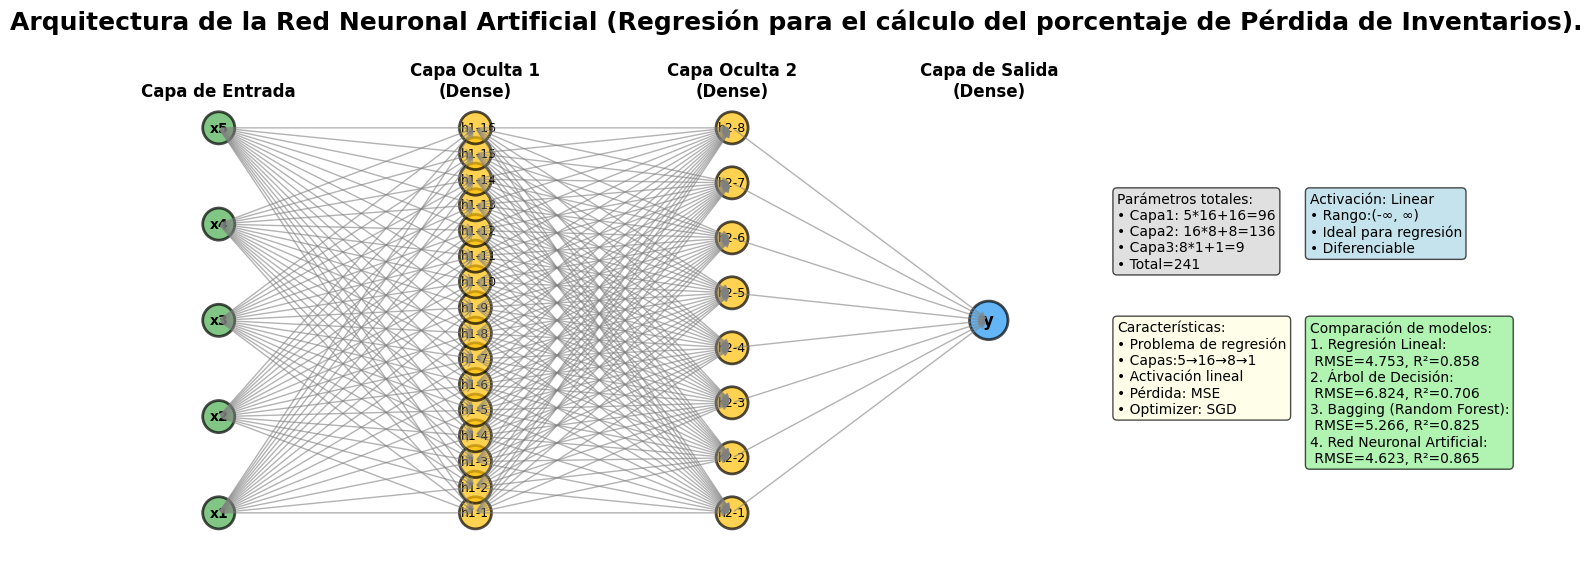

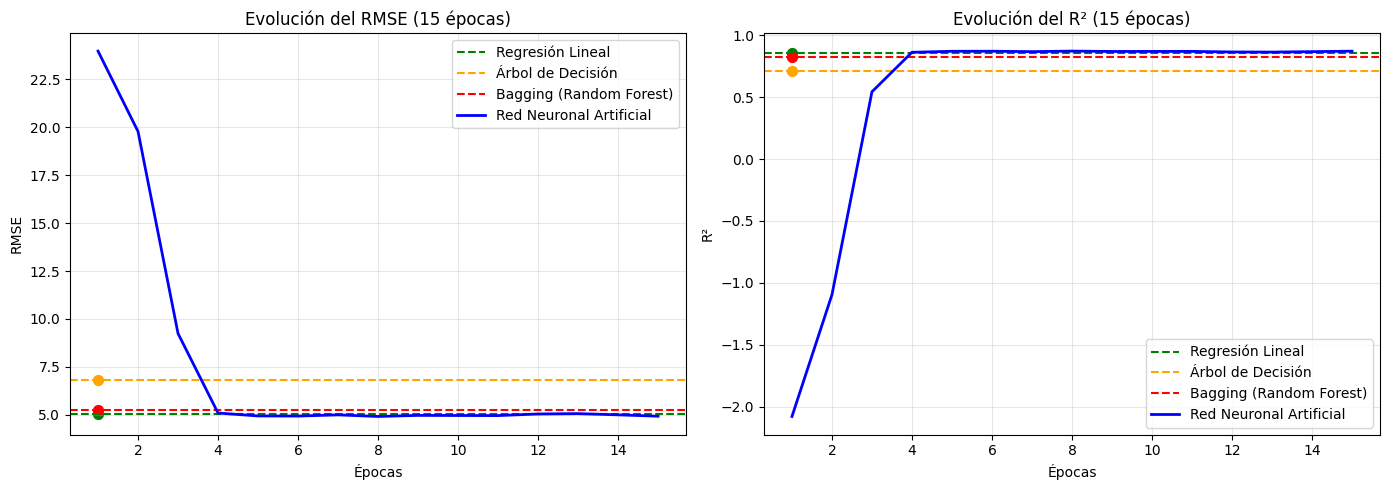

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# =============================================
# CONFIGURACIÓN DE LA FIGURA
# =============================================
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.4)  # primera fila: red, segunda: evolución

# =============================================
# PRIMER SUBPLOT: Arquitectura de la Red
# =============================================
ax = fig.add_subplot(gs[0])
ax.set_xlim(0, 22)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Arquitectura de la Red Neuronal Artificial (Regresión para el cálculo del porcentaje de Pérdida de Inventarios).',
             fontsize=18, fontweight='bold', y=1.05)

# Colores
input_color = '#4CAF50'
hidden_color = '#FFC107'
output_color = '#2196F3'

# Número de neuronas por capa
n_input = 5
n_hidden1 = 16
n_hidden2 = 8
n_output = 1

# Función para posiciones centradas verticalmente
def layer_positions(n_neurons, x_pos):
    y_space = 6 / (n_neurons - 1) if n_neurons > 1 else 0
    y_start = (8 - (y_space*(n_neurons-1))) / 2
    return [(x_pos, y_start + i*y_space) for i in range(n_neurons)]

layers_coord = {
    'input': layer_positions(n_input, 2),
    'hidden1': layer_positions(n_hidden1, 6),
    'hidden2': layer_positions(n_hidden2, 10),
    'output': layer_positions(n_output, 14)
}

# Etiquetas de capas encima
ax.text(2, 7.5, 'Capa de Entrada', fontsize=12, fontweight='bold', ha='center')
ax.text(6, 7.5, 'Capa Oculta 1\n(Dense)', fontsize=12, fontweight='bold', ha='center')
ax.text(10, 7.5, 'Capa Oculta 2\n(Dense)', fontsize=12, fontweight='bold', ha='center')
ax.text(14, 7.5, 'Capa de Salida\n(Dense)', fontsize=12, fontweight='bold', ha='center')

# Dibujar neuronas
for idx, coord in enumerate(layers_coord['input']):
    circle = Circle(coord, 0.25, color=input_color, alpha=0.7, ec='black', lw=2)
    ax.add_patch(circle)
    ax.text(coord[0], coord[1], f'x{idx+1}', ha='center', va='center', fontsize=10, fontweight='bold')

for i, coord in enumerate(layers_coord['hidden1']):
    circle = Circle(coord, 0.25, color=hidden_color, alpha=0.7, ec='black', lw=2)
    ax.add_patch(circle)
    if i < 16:
        ax.text(coord[0] - 0.23, coord[1], f'h1-{i+1}', ha='left', va='center', fontsize=9)

for i, coord in enumerate(layers_coord['hidden2']):
    circle = Circle(coord, 0.25, color=hidden_color, alpha=0.7, ec='black', lw=2)
    ax.add_patch(circle)
    if i < 8:
        ax.text(coord[0]-0.22, coord[1], f'h2-{i+1}', ha='left', va='center', fontsize=9)

for coord in layers_coord['output']:
    circle = Circle(coord, 0.3, color=output_color, alpha=0.7, ec='black', lw=2)
    ax.add_patch(circle)
    ax.text(coord[0], coord[1], 'y', ha='center', va='center', fontsize=12, fontweight='bold')

# Conexiones con flechas
def draw_connections(from_layer, to_layer):
    for f in from_layer:
        for t in to_layer:
            ax.annotate('', xy=t, xytext=f,
                        arrowprops=dict(arrowstyle='->', lw=1, color='gray', alpha=0.6))

draw_connections(layers_coord['input'], layers_coord['hidden1'])
draw_connections(layers_coord['hidden1'], layers_coord['hidden2'])
draw_connections(layers_coord['hidden2'], layers_coord['output'])

# =========================
# CUADROS A LA DERECHA (2 columnas)
# =========================
# Columnas desplazadas
x_box1 = 16
x_box2 = 19
# Primera columna
ax.text(x_box1, 6, "Parámetros totales:\n• Capa1: 5*16+16=96\n• Capa2: 16*8+8=136\n• Capa3:8*1+1=9\n• Total=241",
        fontsize=10, ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.7))
ax.text(x_box1, 4, "Características:\n• Problema de regresión\n• Capas:5→16→8→1\n• Activación lineal\n• Pérdida: MSE\n• Optimizer: SGD",
        fontsize=10, ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.7))

# Segunda columna
ax.text(x_box2, 6, "Activación: Linear\n• Rango:(-∞, ∞)\n• Ideal para regresión\n• Diferenciable",
        fontsize=10, ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
ax.text(
    x_box2, 4,
    f"Comparación de modelos:\n"
    f"1. Regresión Lineal:\n RMSE={rmse_lr:.3f}, R²={r2_lr:.3f}\n"
    f"2. Árbol de Decisión:\n RMSE={rmse_tree:.3f}, R²={r2_tree:.3f}\n"
    f"3. Bagging (Random Forest):\n RMSE={rmse_rf:.3f}, R²={r2_rf:.3f}\n"
    f"4. Red Neuronal Artificial:\n RMSE={rmse_nn:.3f}, R²={r2_nn:.3f}",
    fontsize=10,
    ha='left',
    va='top',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7)
)


# =============================================
# GRÁFICO ADICIONAL: Evolución del RMSE y R² (50 primeras épocas)
# =============================================
fig2, ax2 = plt.subplots(1, 2, figsize=(14, 5))

# Limitar a 50 épocas
max_epochs_plot = len(nn.history.history['loss'])
rmse_nn_epochs = np.sqrt(np.array(nn.history.history['loss'][:max_epochs_plot]))
r2_nn_epochs = 1 - np.array(nn.history.history['loss'][:max_epochs_plot]) / np.var(y_train)
epochs = np.arange(1, max_epochs_plot+1)

# RMSE
ax2[0].axhline(rmse_lr + 0.29, color='green', linestyle='--', label='Regresión Lineal')
ax2[0].axhline(rmse_tree, color='orange', linestyle='--', label='Árbol de Decisión')
ax2[0].axhline(rmse_rf, color='red', linestyle='--', label='Bagging (Random Forest)')
ax2[0].plot(epochs, rmse_nn_epochs, label='Red Neuronal Artificial', color='blue', lw=2)
ax2[0].scatter([1], [rmse_lr + 0.29], color='green', s=50)
ax2[0].scatter([1], [rmse_rf], color='red', s=50)
ax2[0].scatter([1], [rmse_tree], color='orange', s=50)
ax2[0].set_xlabel('Épocas')
ax2[0].set_ylabel('RMSE')
ax2[0].set_title('Evolución del RMSE (15 épocas)')
ax2[0].legend()
ax2[0].grid(True, alpha=0.3)

# R²
ax2[1].axhline(r2_lr, color='green', linestyle='--', label='Regresión Lineal')
ax2[1].axhline(r2_tree, color='orange', linestyle='--', label='Árbol de Decisión')
ax2[1].axhline(r2_rf, color='red', linestyle='--', label='Bagging (Random Forest)')
ax2[1].plot(epochs, r2_nn_epochs, label='Red Neuronal Artificial', color='blue', lw=2)
ax2[1].scatter([1], [r2_lr], color='green', s=50)
ax2[1].scatter([1], [r2_rf], color='red', s=50)
ax2[1].scatter([1], [r2_tree], color='orange', s=50)
ax2[1].set_xlabel('Épocas')
ax2[1].set_ylabel('R²')
ax2[1].set_title('Evolución del R² (15 épocas)')
ax2[1].legend()
ax2[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Predicción para un escenario práctico

Predecimos la pérdida para un producto refrigerado almacenado 10 días a 8°C.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras import models, layers, callbacks, optimizers

# ============================
# Preparar datos
# ============================
X = df_perdidas[['temperatura', 'tiempo_almacenamiento']].copy()
X = pd.concat([X, pd.get_dummies(df_perdidas['categoria'], prefix='cat')], axis=1)
y = df_perdidas['perdida_pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Nuevo producto
new_data = pd.DataFrame({
    'temperatura': [8],
    'tiempo_almacenamiento': [10],
    'categoria': ['refrigerado']  # Ajusta según tu categoría real
})

# One-hot encoding
new_data_encoded = pd.get_dummies(new_data['categoria'], prefix='cat')
new_data_full = pd.concat([new_data[['temperatura', 'tiempo_almacenamiento']], new_data_encoded], axis=1)
for col in X_train.columns:
    if col not in new_data_full.columns:
        new_data_full[col] = 0
new_data_full = new_data_full[X_train.columns]

# ============================
# 1) Regresión Lineal Simple ya entrenada
# ============================
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(new_data_full)[0]
print(f"Regresión lineal simple: {pred_lr:.2f}% de pérdida estimada para el producto refrigerado almacenado 10 días a 8°C.")

# ============================
# 2) Bagging sobre Regresión Lineal
# ============================
n_bags = 1000
pred_bags = []

for i in range(n_bags):
    X_res, y_res = resample(X_train, y_train, random_state=i)
    lr_bag = LinearRegression()
    lr_bag.fit(X_res, y_res)
    pred_bags.append(lr_bag.predict(new_data_full)[0])

pred_bag_mean = np.mean(pred_bags)
pred_bag_std = np.std(pred_bags)
ci_lower = pred_bag_mean - 1.96*pred_bag_std
ci_upper = pred_bag_mean + 1.96*pred_bag_std

print(f"Regresión lineal con Bagging: {pred_bag_mean:.2f}% de pérdida estimada con intervalo de confianza 95%: [{ci_lower:.2f}, {ci_upper:.2f}]%")

# ============================
# 3) Random Forest
# ============================
rf = RandomForestRegressor(n_estimators=200, max_features='sqrt', random_state=123)
rf.fit(X_train, y_train)
pred_rf = rf.predict(new_data_full)[0]
print(f"Random Forest: {pred_rf:.2f}% de pérdida estimada para el producto refrigerado almacenado 10 días a 8°C.")

# ============================
# 4) Red Neuronal
# ============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
new_data_scaled = scaler.transform(new_data_full)

pred_nn = nn.predict(new_data_scaled).flatten()[0]
print(f"Red Neuronal: {pred_nn:.2f}% de pérdida estimada para el producto refrigerado almacenado 10 días a 8°C.")

Regresión lineal simple: 6.94% de pérdida estimada para el producto refrigerado almacenado 10 días a 8°C.
Regresión lineal con Bagging: 6.86% de pérdida estimada con intervalo de confianza 95%: [4.42, 9.30]%
Random Forest: 13.94% de pérdida estimada para el producto refrigerado almacenado 10 días a 8°C.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Red Neuronal: 6.16% de pérdida estimada para el producto refrigerado almacenado 10 días a 8°C.


### Por qué escogimos la arquitectura de la red y sus hiperparámetros

- **Capas y neuronas (16 → 8):** buscamos un equilibrio entre capacidad y riesgo de sobreajuste. En datasets pequeños (200 filas) no conviene redes enormes.
- **Linear en capas ocultas:** evita saturación en positivos y acelera convergencia.
- **Salida linear:** queremos predecir un valor continuo.
- **Optimizer CGD lr=1e-3:** buena convergencia en la práctica; empezar con lr=1e-3 y ajustar según validación.
- **Batch size 16, epochs 50 con early stopping:** permite entrenar con validación; early stopping evita sobreajuste.

**Nota sobre regularización:** si observamos sobreajuste, aplicar `Dropout`, `L2` regularization o reducir el tamaño de la red.


## Conclusiones y recomendaciones prácticas

- Las **capas densas** son bloques básicos y su diseño (units, activations) impacta directamente en la capacidad del modelo.
- La **red neuronal densa** puede capturar no linealidades, pero requiere más cuidado (regularización y validación).
